In [1]:
import os.path as op
import time
import numpy as np
import matplotlib as mpl
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import tools
from imp import reload
reload(tools)
from tools import syn_registration, affine_registration
%matplotlib inline


import dipy.tracking.streamline as dts
import dipy.tracking.utils as dtu
import dipy.data as dpd

In [2]:
import nibabel as nib
import dipy.data as dpd
import os

In [3]:
afqpath = '/Users/arokem/source/AFQ/'
# afqpath = '/home/jyeatman/git/afq'

In [4]:
ni, gtab = dpd.read_stanford_hardi()

Dataset is already in place. If you want to fetch it again please first remove the folder /Users/arokem/.dipy/stanford_hardi 


In [5]:
hardi_data = ni.get_data()
hardi_affine = ni.get_affine()

In [6]:
b0 = hardi_data[..., gtab.b0s_mask]

In [7]:
mean_b0 = np.mean(b0, -1)

In [8]:
ni_b0 = nib.Nifti1Image(mean_b0, hardi_affine)

In [9]:
ni_b0.to_filename('mean_b0.nii')

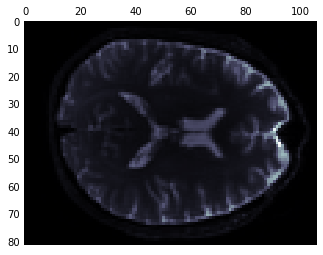

In [10]:
plt.matshow(mean_b0[:,:,mean_b0.shape[-1]//2], cmap=cm.bone)

In [11]:
dpd.fetch_mni_template()

Data size is approximately 35MB
Dataset is already in place. If you want to fetch it again please first remove the folder /Users/arokem/.dipy/mni_template 


({'COPYING': ('https://digital.lib.washington.edu/researchworks/bitstream/handle/1773/33312/COPYING',
   '6e2168072e80aa4c0c20f1e6e52ec0c8'),
  'mni_icbm152_t1_tal_nlin_asym_09a.nii': ('https://digital.lib.washington.edu/researchworks/bitstream/handle/1773/33312/mni_icbm152_t1_tal_nlin_asym_09a.nii',
   '1ea8f4f1e41bc17a94602e48141fdbc8'),
  'mni_icbm152_t2_tal_nlin_asym_09a.nii': ('https://digital.lib.washington.edu/researchworks/bitstream/handle/1773/33312/mni_icbm152_t2_tal_nlin_asym_09a.nii',
   'f41f2e1516d880547fbf7d6a83884f0d')},
 '/Users/arokem/.dipy/mni_template')

In [12]:
MNI_T2 = dpd.read_mni_template()

Data size is approximately 35MB
Dataset is already in place. If you want to fetch it again please first remove the folder /Users/arokem/.dipy/mni_template 


In [13]:
MNI_T2_data = MNI_T2.get_data()

In [14]:
MNI_T2_affine = MNI_T2.get_affine()

In [15]:
#xformed_b0, affine = affine_registration(mean_b0, MNI_T2_data, 
#                                         moving_grid2world=hardi_affine, 
#                                         static_grid2world=MNI_T2_affine)

In [16]:
#plt.matshow(xformed_b0[:, :, xformed_b0.shape[-1]//2], cmap=cm.bone)
#plt.matshow(MNI_T2_data[:, :, MNI_T2_data.shape[-1]//2], cmap=cm.bone)

In [17]:
warped_b0, mapping = syn_registration(mean_b0, MNI_T2_data,
                                      moving_grid2world=hardi_affine, 
                                      static_grid2world=MNI_T2_affine, 
                                      #step_length=0.1,
                                      #sigma_diff=2.0,
                                      metric='CC', dim=3, level_iters = [10, 10, 5], 
                                      #prealign=affine.affine)
                                      prealign=None)

Creating scale space from the moving image. Levels: 3. Sigma factor: 0.200000.
Creating scale space from the static image. Levels: 3. Sigma factor: 0.200000.
Optimizing level 2
Optimizing level 1
Optimizing level 0


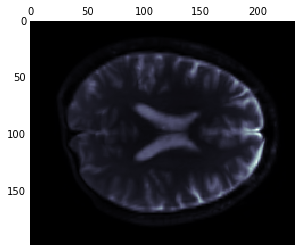

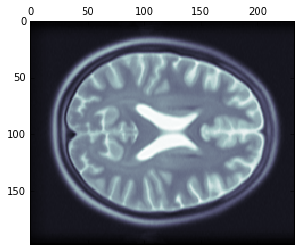

In [18]:
plt.matshow(warped_b0[:,:,warped_b0.shape[-1]//2], cmap=cm.bone)
plt.matshow(MNI_T2_data[:, :, MNI_T2_data.shape[-1]//2], cmap=cm.bone)

In [19]:
new_ni = nib.Nifti1Image(warped_b0, MNI_T2_affine)

In [20]:
new_ni.to_filename('./warped_b0.nii.gz')

In [21]:
LOCC_ni = nib.load(os.path.join(afqpath,'templates/callosum2/L_Occipital.nii.gz'))
ROCC_ni = nib.load(os.path.join(afqpath,'templates/callosum2/R_Occipital.nii.gz'))
midsag_ni = nib.load(os.path.join(afqpath,'templates/callosum2/Callosum_midsag.nii.gz'))

In [22]:
LOCC_data = LOCC_ni.get_data()
ROCC_data = ROCC_ni.get_data()
midsag_data = midsag_ni.get_data()

In [23]:
import scipy.ndimage as ndim

In [24]:
dilated_midsag = ndim.binary_dilation(midsag_data)

In [25]:
midsag_affine = midsag_ni.get_affine()

In [26]:
#warped_midsag = mapping.transform_inverse(midsag_data)

In [27]:
dilated_midsag.astype(int)

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ..., 
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ..., 
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ..., 
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ..., 
       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ..., 
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ..., 
        [0, 0, 0, 

In [28]:
warped_midsag = mapping.transform_inverse(ndim.binary_dilation(midsag_data).astype(int), interpolation='nearest')
warped_LOCC = mapping.transform_inverse(ndim.binary_dilation(LOCC_data).astype(int), interpolation='nearest')
warped_ROCC = mapping.transform_inverse(ndim.binary_dilation(ROCC_data).astype(int), interpolation='nearest')


In [29]:
#bin_warped_LOCC = np.ceil(warped_LOCC)
bin_warped_midsag = np.ceil(warped_midsag)

In [30]:
im = np.sum(np.ceil(bin_warped_midsag), axis=0)

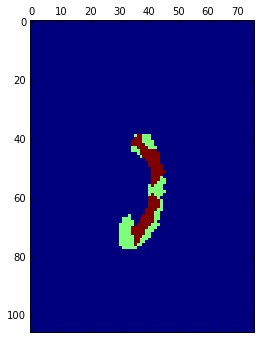

In [31]:
plt.matshow(im)

In [32]:
import scipy.ndimage as ndim

In [33]:
#filled_warped_LOCC= ndim.binary_dilation(bin_warped_LOCC, iterations=1).astype(int)
filled_warped_midsag= ndim.binary_fill_holes(bin_warped_midsag.astype(int)).astype(int)

In [34]:
np.unique(filled_warped_midsag)

array([0, 1])

In [35]:
filled_warped_midsag.shape

(81, 106, 76)

In [36]:
filled_warped_midsag_ni = nib.Nifti1Image(filled_warped_midsag, hardi_affine)

In [37]:
filled_warped_midsag_ni.to_filename('./warped_midsag.nii.gz')

In [38]:
im = np.sum(np.ceil(ndim.binary_fill_holes(filled_warped_midsag)), axis=0)

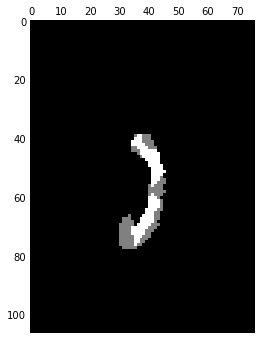

In [39]:
plt.matshow(im, cmap=cm.gray)

In [40]:
sl_from_file = nib.trackvis.read('./csa_white_matter.trk', points_space='rasmm')

In [41]:
all_sl = [s[0] for s in sl_from_file[0]]

In [42]:
xform_sl = [s for s in dtu.move_streamlines(all_sl, np.linalg.inv(hardi_affine)) if s.shape[0]>10]

In [43]:
len(xform_sl)

499293

In [44]:
select_sl = xform_sl
ROIs = [warped_midsag, warped_LOCC, warped_ROCC]
t0 = time.time()
for r in ROIs:
    select_sl = dts.select_by_rois(select_sl, [r.astype(bool)], [True])

select_sl = list(select_sl)
t1 = time.time()
print(t1 - t0)

162.786913872


In [45]:
import dipy.tracking.streamline as dts

In [46]:
select_sl = dts.orient_by_rois(select_sl, ROIs[0], ROIs[1])

In [47]:
t0 = time.time()
select_sl = [s for s in select_sl]
t1 = time.time()
print(t1 - t0)

0.000786066055298


In [48]:
len(select_sl)

3831

In [49]:
from dipy.viz import fvtk
from dipy.viz.colormap import line_colors

In [50]:
ren = fvtk.ren()
fvtk.add(ren, fvtk.line(select_sl, line_colors(select_sl)))
fvtk.record(ren, n_frames=1, out_path='callosal_tracks.png', size=(600, 600))
LOCC_ROI_actor = fvtk.contour(warped_LOCC, levels=[1], colors=[(1., 1., 0.)],
                            opacities=[1.])

#ROCC_ROI_actor = fvtk.contour(warped_ROCC, levels=[1], colors=[(1., 1., 0.)],
#                            opacities=[1.])

cc_ROI_actor = fvtk.contour(warped_midsag, levels=[1], colors=[(1., 1., 0.)],
                            opacities=[1.])


for act in [cc_ROI_actor, LOCC_ROI_actor]:#, ROCC_ROI_actor]:
    fvtk.add(ren, act)

fvtk.show(ren)

In [51]:
import IPython.display as display

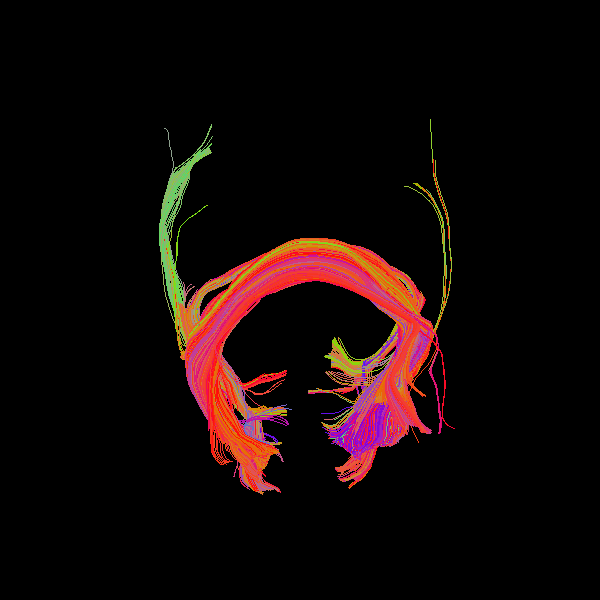

In [52]:
display.Image(filename='callosal_tracks.png')

In [53]:
len(select_sl)

3831

In [79]:
import dipy.tracking.streamlinespeed as speed

fgarray = np.array(speed.set_number_of_points(select_sl, 100))

fgarray.shape

#fcore = np.median(fgarray,axis=0)
#fcore.shape

(3831, 100, 3)

In [74]:
import dipy.tracking.streamline as dts

In [75]:
reload(dts)

<module 'dipy.tracking.streamline' from '/Users/arokem/source/dipy/dipy/tracking/streamline.py'>

In [76]:
from dipy.tracking.streamline import values_from_volume

In [ ]:
values_from_volume(b0, fgarray, affine=)

In [56]:
fgarray.shape

(3831, 100, 3)

In [57]:
fvtk.line?

In [58]:
fgarray[0]

array([[ 46.28879166,  21.84094238,  38.19010544],
       [ 47.15712863,  22.56239918,  37.9429851 ],
       [ 47.91000543,  23.41079025,  37.72555409],
       [ 48.59187019,  24.31617824,  37.49560429],
       [ 49.25463904,  25.23393412,  37.25914574],
       [ 49.94175591,  26.15055486,  37.10285271],
       [ 50.58691759,  27.10745634,  37.03668639],
       [ 50.98179481,  28.17637754,  37.17255091],
       [ 51.16559246,  29.30403515,  37.34824425],
       [ 51.29448906,  30.44977343,  37.41850663],
       [ 51.29267669,  31.6000877 ,  37.30991591],
       [ 51.21774042,  32.72943419,  37.07990401],
       [ 50.98668064,  33.80691456,  36.7316317 ],
       [ 50.65366896,  34.86047829,  36.39210853],
       [ 50.18277256,  35.87777507,  36.11390485],
       [ 49.56652564,  36.81600494,  35.83733652],
       [ 48.85356627,  37.67839853,  35.5479733 ],
       [ 48.02515344,  38.4383559 ,  35.28492118],
       [ 47.04728276,  38.95344509,  34.95876447],
       [ 45.9795339 ,  39.31894

In [59]:
ren = fvtk.ren()
fvtk.add(ren, fvtk.line([s for s in fgarray], [0, .5, 1],opacity=.1))
fvtk.add(ren, fvtk.line(fcore, [1, 1, 0],opacity=1, linewidth = 5))
LOCC_ROI_actor = fvtk.contour(warped_LOCC, levels=[1], colors=[(1., 1., 0.)],
                            opacities=[1.])

#ROCC_ROI_actor = fvtk.contour(warped_ROCC, levels=[1], colors=[(1., 1., 0.)],
#                            opacities=[1.])

cc_ROI_actor = fvtk.contour(warped_midsag, levels=[1], colors=[(1., 1., 0.)],
                            opacities=[1.])


for act in [cc_ROI_actor, LOCC_ROI_actor]:#, ROCC_ROI_actor]:
    fvtk.add(ren, act)

    fvtk.record(ren, n_frames=1, out_path='callosal_core.png', size=(600, 600))

fvtk.show(ren)

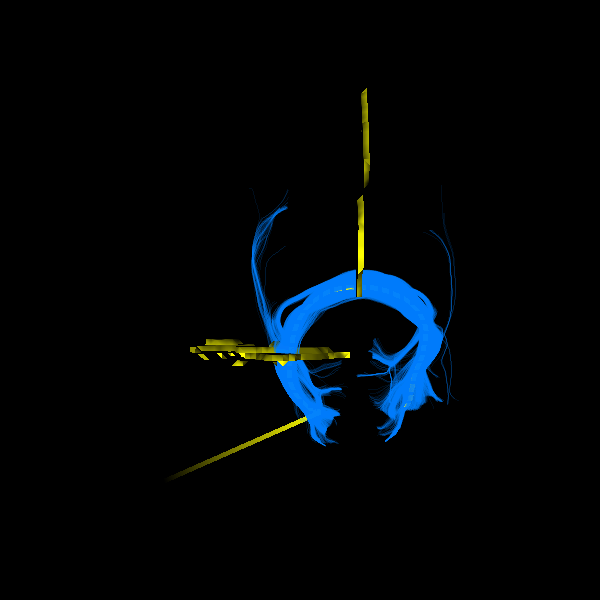

In [60]:
display.Image(filename='callosal_core.png')

In [61]:
if not os.path.exists('fa.nii.gz'):
    import dipy.reconst.dti as dti
    dtmodel = dti.TensorModel(gtab)
    dtfit = dtmodel.fit(hardi_data)
    FAdata = dtfit.fa
    FAimg = nib.Nifti1Image(FAdata, hardi_affine)
    nib.save(FAimg, 'fa.nii.gz')
else:
    FAimg = nib.load('fa.nii.gz')
    FAdata = FAimg.get_data()

In [62]:
FAimg.affine

array([[   2.,    0.,    0.,  -80.],
       [   0.,    2.,    0., -120.],
       [   0.,    0.,    2.,  -60.],
       [   0.,    0.,    0.,    1.]])

In [63]:
from scipy.interpolate import RegularGridInterpolator

In [64]:
from dipy.align.vector_fields import interpolate_scalar_3d

In [65]:
interpolate_scalar_3d?

In [66]:
import nibabel as nib
import numpy as np

In [67]:
img = nib.Nifti1Image(np.arange(2000, dtype=np.float).reshape(20, 10, 10), np.eye(4))

In [68]:
data = img.get_data()

In [69]:
data.dtype


dtype('float64')

In [71]:
import values_from_volume

ImportError: cannot import name values_from_volume

In [108]:
fgarray = np.array(speed.set_number_of_points(select_sl, 100))
values = values_from_volume(FAdata, fgarray, affine=None)
w = np.ones(values.shape) / values.shape[0]

In [116]:
w.shape

(3831, 100)

In [117]:
tract_profile = np.sum(w * values, 0)

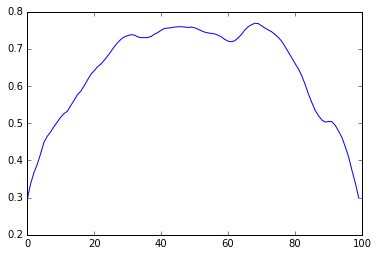

In [118]:
plt.plot(tract_profile)

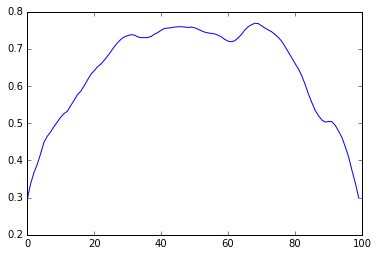

In [92]:
%matplotlib inline
plt.plot(np.mean(values, 0))

In [119]:
fgarray.shape

(3831, 100, 3)

array([[  7.79696493,   2.73080157,   2.7134098 ],
       [  2.73080157,  18.59148405,  -0.16630518],
       [  2.7134098 ,  -0.16630518,  48.61044694]])

In [123]:
import scipy.stats as stat

array([[ 8487139.64080319,  3793980.19013384,  7344281.52260756],
       [ 3793980.19013384,  1763834.39140575,  3280315.58525439],
       [ 7344281.52260756,  3280315.58525439,  6545899.77212253]])

In [ ]:
#def gaussian_weights(fgarray)

for ii in range(fgarray.shape[1]):
    cov = np.cov(fgarray[:, ii, :].T) 

In [134]:
import dipy.tracking.streamlinespeed as speed

def calculate_tract_profile(img, streamlines, affine=None, n_points=100, 
                            weighting=None):
    """ 
    
    Parameters
    ---------- 
    img : 3D volume
    
    streamlines : list of arrays, or array
    
    weighting : 1D array, or str (optional)
    
        'gaussian'
        'distance'
        'uniform' (default)
    
    """
    if isinstance(streamlines, list):
        # Resample each streamline to the same number of points 
        # list => array
        fgarray = np.array(speed.set_number_of_points(streamlines, n_points))

    values = values_from_volume(img, fgarray, affine=affine)
    
    # We assume that weights *always sum to 1 across streamlines*:
    if weighting is None: 
        w = np.ones(values.shape) / values.shape[0]
        
    #elif weighting == 'gaussian':
    #    w = gaussian_weights(fgarray)
    
    #elif weighting == 'distance':

    tract_profile = np.sum(w * values, 0)

    #tract_profile = np.mean(w * values, 0)
    
    if weighting is not None:
        return weights, tract_profile
    else: 
        return tract_profile    

In [135]:
tract_profile = calculate_tract_profile(FAdata, select_sl)

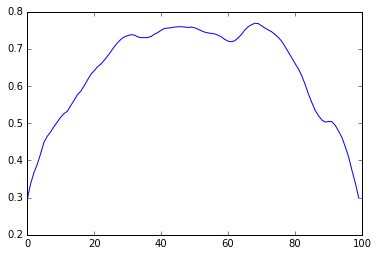

In [136]:
plt.plot(tract_profile)

In [ ]:
affine = np.array([[0.5, 0, 0, 10], [0, 0.5, 0, -10], [0, 0, 0.5, 0], [0, 0, 0, 1]])

In [ ]:
xform_streamlines = dtu.move_streamlines(streamlines, affine)

In [ ]:
streamlines

In [ ]:
list(xform_streamlines)

In [ ]:
vv = vals_from_img(img, np.array(streamlines), sl_affine=affine)

In [ ]:
vv

In [ ]:
debug

In [ ]:
vv[0][0]

In [ ]:
debug

In [ ]:
np.array([[1, 0, 0], [1.5, 0, 0], [2, 0, 0]])

In [ ]:
import dipy.align.vector_fields as vfu

In [ ]:
np.random.seed(3121121)
sz = 64
target_shape = (sz, sz, sz)
image = np.empty(target_shape)
image[...] = np.random.randint(0, 10, np.size(image)).reshape(target_shape)
# Select some coordinates to interpolate at
nsamples = 200
locations =\
    np.random.ranf(3 * nsamples).reshape((nsamples, 3)) * (sz + 2) - 1.0

# Call the implementation under test
interp, inside = vfu.interpolate_scalar_3d(image, locations)


In [ ]:
vfu.interpolate_scalar_nn_3d?

In [ ]:
image.shape

In [ ]:
interp[0]

In [ ]:
data = np.arange(2000).reshape(20, 10, 10)

In [ ]:

data[1.5, 0, 0]